# BE 521: Homework 5 Questions

Spring 2024

42 points

Due: Feb 29th, 2024

Objective: Visual responses and likelihood

## V1 Dataset
In this homework, you will work with data from 18 cells recorded from mouse primary visual cortex (also known as V1). Cells in this area are responsive to specific angles. Hence, a common stimulation paradigm is to show the subject a sinusoidal grating drifting at a specific angle (see included figures).

This data was collected and graciously provided by Daniel Denman in the Contreras Lab, University of Pennsylvania. The file `mouseV1.mat` contains two variables: `neurons`, a numpy array representing all the times that each of the 18 cells fired a spike during the approximately 7 minute long experiment, and `stimuli`, which provides the time (first column, in milliseconds) that a given angle (second column) was presented in this experiment.  Note that each stimulus in `stimuli` is presented for exactly 2 seconds, after which a gray screen is presented for approximately 1.5 seconds (therefore each trial is approximately 3.5 seconds in duration).


In [22]:
!jupyter nbconvert --to html YuanchaoZhang_HW5.ipynb

[NbConvertApp] Converting notebook YuanchaoZhang_HW5.ipynb to html
[NbConvertApp] Writing 1239955 bytes to YuanchaoZhang_HW5.html


In [2]:
#Set up the notebook environment
from IPython.display import Image
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat
import scipy.stats

## 0. Uploading Data (0 pts)
Upload the ``mouseV1.mat`` data to google colab.
We'll load it in with the following code.

In [3]:
#loadmat returns a dictionary of the data
data = loadmat('mouseV1.mat')
print(data.keys())

#get the neurons and stimuli data
neurons = data['neurons']
stimuli = data['stimuli']

#confirm that neurons contains 18 subarrays and that stimuli has two columns
print("neuron variable type: " + str(type(neurons)) + " of shape " + str(neurons.shape))
print("stimuli variable type: " + str(type(stimuli)) + " of shape " + str(stimuli.shape))

dict_keys(['__header__', '__version__', '__globals__', 'stimuli', 'neurons', 'info'])
neuron variable type: <class 'numpy.ndarray'> of shape (1, 18)
stimuli variable type: <class 'numpy.ndarray'> of shape (120, 2)


## 1. Stimulus Response (11 pts)
In this section, you will explore the response of cells to different stimulus angles.

### 1
How many unique rating angles, `m`, are there in `stimuli`? (1 pts)

In [4]:
# My code here
# print(stimuli)
# print(stimuli[5][0])
# print(stimuli[:, 1])
# print(neurons[0][4][5][0])
stimuli_angle_list = []
for i in range(len(stimuli)):
  stimuli_angle_list.append(stimuli[i][1])

#print(stimuli_angle_list)
unique_angle_list = np.unique(stimuli_angle_list)
print("List of Unique Angles:", unique_angle_list)

m = len(unique_angle_list)
print("Number of unique rating angles in stimuli: m =", m)

List of Unique Angles: [  0  30  60  90 120 150 180 210 240 270 300 330]
Number of unique rating angles in stimuli: m = 12


**My Answer Here:**

Number of unique rating angles in stimuli: **m = 12**

### 2
A *tuning curve* is frequently used to study the response of a neuron to a given range of input stimuli.
To create tuning curves for this data, calculate the average number of spikes each cell fires in response to each grating angle. Store the result in an $18\times m$ dimensional matrix, where each element represents the response of a single neuron to a particular input stimulus angle, with each neuron assigned a row and each angle assigned a column. In a $2\times 2$ Matlab subplot, plot the tuning curve for the first four cells.  Place the stimulus angle on the x-axis and the number of spikes on the y-axis.  (6 pts)

Tuning Matrix:
 [[ 7.1  2.4  2.3  3.5  2.3  5.3  5.   3.4  2.1  2.7  1.8  2.1]
 [ 1.5  2.8  3.   0.6  0.5  0.5  1.4  3.3  4.4  2.2  1.   0.4]
 [ 5.1 10.8  6.7  4.   5.   3.6  3.   8.4  5.9  5.3  3.9  4.9]
 [12.4 13.9 22.6 16.7 21.3 18.  13.6 18.1 22.3 26.4 13.8 14.3]
 [ 2.1  0.7  1.2  1.6  1.5  2.2  1.7  1.1  2.8  7.4  2.9  1.6]
 [ 0.4  0.9  1.9  0.5  0.6  0.9  0.2  1.   1.9  0.5  0.7  0.7]
 [ 0.5  2.8  3.2  1.2  0.4  0.4  0.9  2.3  3.4  1.1  0.9  0.6]
 [ 1.6  0.1  0.4  0.5  1.3  4.   1.4  0.2  0.5  0.2  0.8  3. ]
 [ 0.9  0.6  2.6  2.   2.2  1.5  0.5  0.5  0.6  1.   2.   0.6]
 [ 0.5  0.8  1.   0.3  0.1  0.2  0.1  0.8  0.7  1.2  0.4  0.5]
 [ 0.3  0.2  0.1  0.2  0.3  1.   0.4  0.5  0.3  0.   0.6  1.2]
 [10.5  8.4 10.3  9.1 12.2 12.4  7.5  8.   8.6  8.7 12.7  9.9]
 [ 0.9  0.8  1.7  1.4  2.5  1.1  0.9  0.6  2.   2.9  1.7  1.6]
 [ 0.5  0.2  0.6  3.4  3.7  0.5  0.3  0.4  0.7  4.3  4.9  3. ]
 [ 1.9  6.7  5.9  1.   0.9  0.7  0.4  1.5  2.1  0.7  0.5  1.1]
 [ 1.4  0.8  0.8  1.   0.9  0.6  0.   0

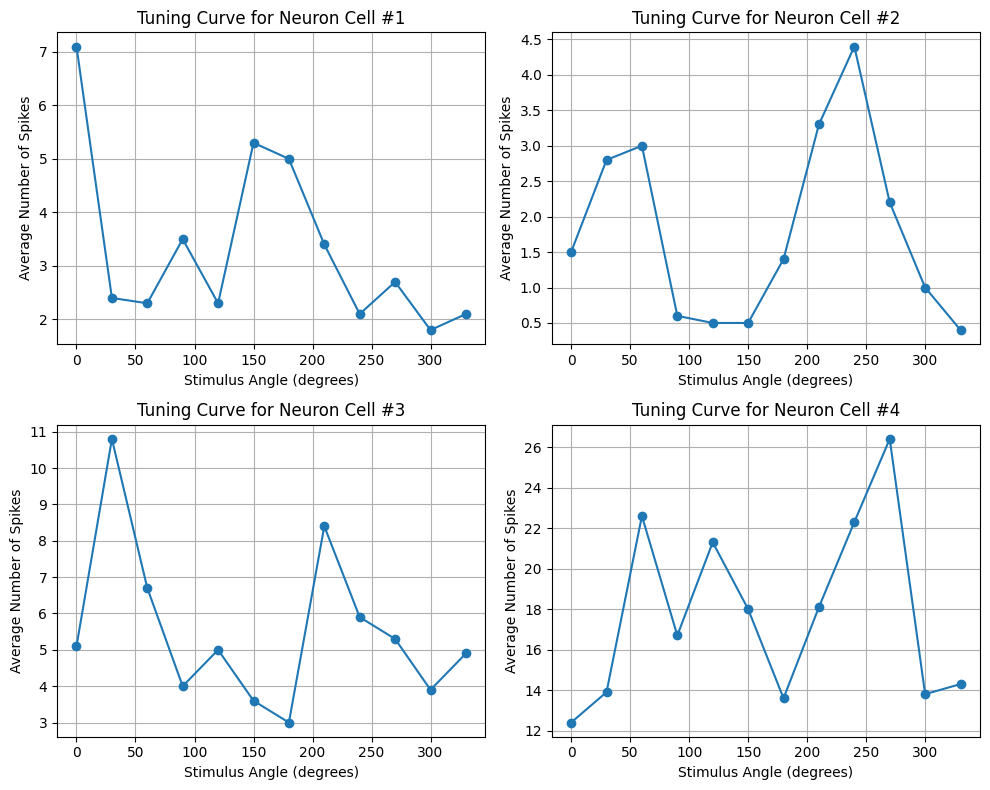

In [5]:
# My code here
# print(len(stimuli))
# print(neurons)
### Number of cells:
num_cells = len(neurons[0])
num_neurons = len(stimuli[1])
# print(num_cells)
# print(len(neurons[0][0]))
# print(neurons[0][0])
# print(neurons[0][1])
spike_list=[]
stimuli_spike_list = []
# for i in range(len(stimuli)):
  # stimuli_angle_list.append(stimuli[i][1])'''

# print(len(neurons[0][1]))
# print(len(neurons[0][3]))
# print(enumerate(unique_angle_list))

### stimuli, which provides the time (first column, in milliseconds), neurons also provide
### Duration of stimulus = 2000 ms, Duration of trial = 2000ms + 1500ms = 3500ms
stimulus_trial_duration = 3.5 * 1000  # duration of each stimulus in ms


spike_counts = np.zeros(len(unique_angle_list))
Tuning_Matrix = np.zeros((num_cells, m))
#print(Tuning_Matrix)

# Iterate over the first four neurons
for neuron_idx in range(num_cells):

  # Initialize arrays to store spike counts and stimulus angles
  spike_times = neurons[0][neuron_idx]
  # print(spike_times)

  # Iterate over each angle and compare with angles in the stimuli data
  # for angle in unique_angle_list:
  for angle_idx, angle in enumerate(unique_angle_list):

    # print(angle_idx)
    # print(spike_times)

    # Find the indices of stimuli with the current angle
    angle_indices = np.where(stimuli[:, 1] == angle)[0]
    # print(len(angle_indices))

    # Initialize spike count for the current angle
    spike_count = 0

    # Iterate over each stimulus speak time and consider duration
    for a in angle_indices:

      # Find spike times within the time window of the stimulus presentation

      # print(stimuli[a, 0])
      # print(np.logical_and(spike_times >= stimuli[a, 0], spike_times < stimuli[a, 0] + stimulus_trial_duration))
      stimuli_time = stimuli[a, 0]

      ### If a certain spike time in somewhere of neurons data >= its related peak time in stimuli data
      ### AND < such a spike time + each stimuli trial duration(3.5s = 3500ms)
      ### True: Store such a spike time; False: Do Nothing
      spike_times_within_window = spike_times[np.logical_and(spike_times >= stimuli_time, spike_times < stimuli_time + stimulus_trial_duration)]
      # print(spike_times_within_window)

      # Increment spike count for the current angle
      spike_count = spike_count + len(spike_times_within_window)

    # Calculate the average spike count
    average_spike_count = spike_count / len(angle_indices)

    # Store the result in the tuning curves matrix
    Tuning_Matrix[neuron_idx, angle_idx] = average_spike_count
    # print(Tuning_Matrix)

print("Tuning Matrix:\n", Tuning_Matrix, '\n\n\n')

# Initialize subplot
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

for plot in range(4):
  plot_row_idx = plot // 2
  plot_col_idx = plot % 2
  ax = axs[plot_row_idx, plot_col_idx]
  ax.plot(unique_angle_list, Tuning_Matrix[plot], '-o')
  ax.set_title(f'Tuning Curve for Neuron Cell #{plot + 1}')
  ax.set_xlabel('Stimulus Angle (degrees)')
  ax.set_ylabel('Average Number of Spikes')
  ax.grid(True)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

####2a
Look through the tuning response curves of each of the 18 cells.  How reasonable is it to assume that the response of a given cell to angle $\theta$ is the same as its response to angle $\theta+180$? Include at least a few tuning curves to back up your answer. (2 pts)

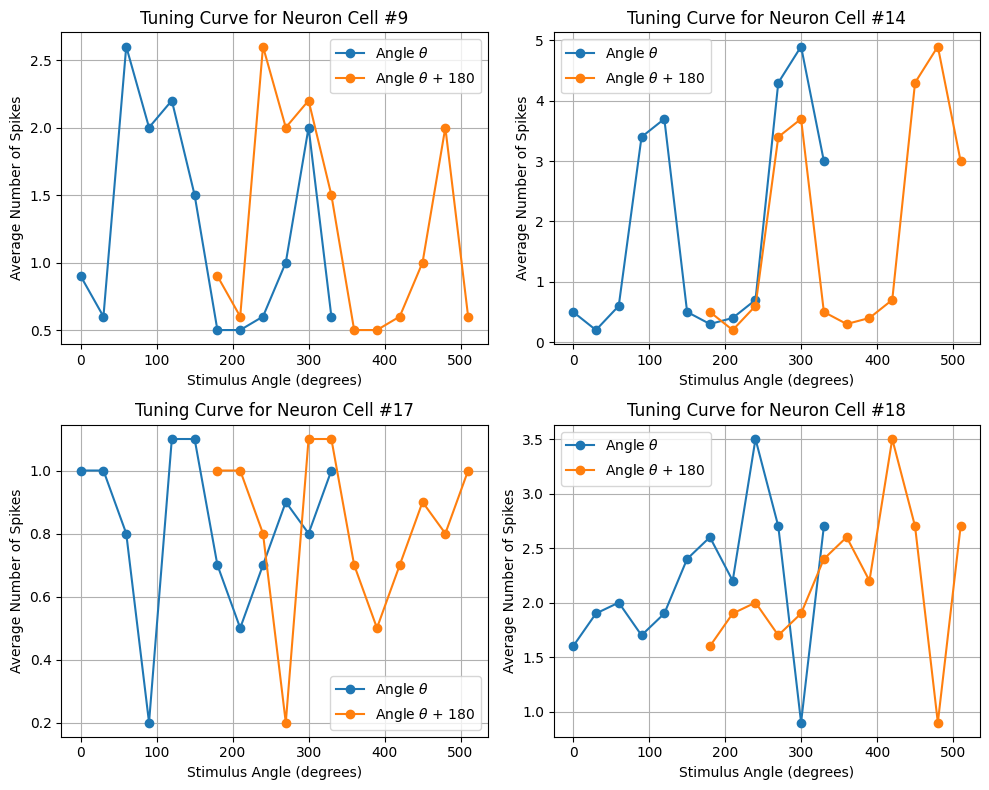

In [6]:
# My code here
# Plotting tuning curves for a few neurons
chosen_tuning_neurons = [8, 13, 16, 17]

plt.figure(figsize=(10, 8))

for idx, neuron_idx in enumerate(chosen_tuning_neurons, 1):
  ax = plt.subplot(2, 2, idx)
  ax.plot(unique_angle_list, Tuning_Matrix[neuron_idx], '-o', label=r'Angle $\theta$')
  ax.plot(unique_angle_list + 180, Tuning_Matrix[neuron_idx], '-o', label=r'Angle $\theta$ + 180')
  ax.set_title(f'Tuning Curve for Neuron Cell #{neuron_idx + 1}')
  ax.set_xlabel('Stimulus Angle (degrees)')
  ax.set_ylabel('Average Number of Spikes')
  ax.grid(True)
  ax.legend()

plt.tight_layout()
plt.show()

**My Answer Here:**

According to Tuning Curves for **Neuron Cell #9, 14, 17, 18** as examples(Other Neuron Cells also prove the same response), comparing plots of Angle (𝜃) and Angle (𝜃+180), two plots are **exactly symmetric** when the relation of two angles between Angle (𝜃) and Angle (𝜃+180). **Thus, a given cell's response to Angle 𝜃  is the same as its response to angle  𝜃+180 is precisely accurate.**

####2b
Does this assumption have any physiological justification (given what you know about the types of cells in V1)? (2 pts)

**My Answer Here:**

Since neurons in the primary visual cortex (V1) demonstrate **orientation selectivity**, the physiological architecture of this region supports the hypothesis that a neuron's response to angle θ is the same as its response to angle θ+180.

Neurons prefer certain orientation angles due to the arrangement of excitatory and inhibitory inputs inside orientation columns, which causes this selectivity. The same patterns of excitatory and inhibitory inputs received by neurons within the same orientation column affect the response qualities of those neurons, which explains the symmetry shown in the tuning curves for angles θ and θ+180.

**Generally, angles θ and θ+180 represent the same orientation in the physiological area and provide the same response.**

## 2. Neural Decoding (31 pts)

Suppose we would like to work backwards - that is, for a given neural response, can we predict what the grating angle was? This process is called "neural decoding,'' and is especially of interest to the BCI motor control community (as we'll see in a later homework).

In this section, we will try out an approach which is detailed in Jazayeri & Movshon 2006. The method we will use involves finding the maximum likelihood of the data.

Here, the data is the number of spikes $s_i$ that cell $i$ fires when the subject sees a stimulus with grating angle $\theta$. One way to think about our likelihood function is to ask the question "given a stimulus angle $\theta$, how many spikes would I expect this cell to fire?'' We can represent this number of spikes $s_i$ using a Poisson process with parameter $f_i(\theta)$ for a stimulus $\theta$, where $f_i$ represents neuron $i$'s tuning function.

A Poisson distribution is often used to model count data that occurs at a constant rate, and in this case the rate is given by $f_i(\theta)$. In other words, our likelihood function $L_i(\theta)$ for each neuron $i$ is the probability $p(s_i|\theta)$ of neuron $i$ firing $s_i$ spikes for a given value of $\theta$.

The idea in this method is to calculate the (natural) log likelihood function of each neuron and then add them all together to get the log likelihood function of the entire population of ($n$) neurons. We often work with the log likelihood because it allows adding of probabilities instead of multiplying, which can lead to numerical problems.

\begin{align*}
p(s_i|\theta) \sim &\; Pois(f_i(\theta)) = \frac{f_i(\theta)^{s_i}}{s_i!} e^{-{f_i(\theta)}} \tag{Poisson probability density}\\
L_i(\theta) =&\; p(s_i|\theta) \tag{Likelihood of a given neuron firing at $s_i$}\\
L(\theta) = &\; \prod_{i=1}^n p(s_i|\theta) \tag{Joint likelihood of all n neurons}\\
\log L(\theta) = &\;\sum_{i=1}^n \log L_i(\theta) = \sum_{i=1}^n \log p(s_i|\theta)  \tag{Take log}\\
\propto &\;  \sum_{i=1}^n s_i \log f_i(\theta) \tag{evaluation of PDF and simplifying}
\end{align*}

Thus, we can define the log likelihood for each neuron $i$ as the log of its tuning curve $f_i(\theta)$ times the number of spikes $s_i$ it fires for a particular stimulus $\theta$, and the population log likelihood is simply the summation across all cells. This tells us that, given a set of tuning curves $f_i(\theta)$, we can compute the likelihood of observing our data $s$.
 But we already have those tuning curves for each cell from question 1.2, so all we need to know for a new (hidden) stimulus is how many spikes each neuron fires. Let $\mathbf{s}$ be the $n$-dimensional column vector of the number of spikes each cell fires after the subject is presented with a new stimulus $\theta'$ and let $\mathbf{F}$ be the $n\times m$ matrix representing the tuning curves of each neuron at each of the $m$ stimuli (for us, $m$ is the number of stimuli between 0 and 150 degrees because we assume that all neurons respond equally to $\theta$ and $\theta+180$ degrees).  We can then compute the log likelihood of the new stimulus $\theta'$ easily using the inner product of $\mathbf{s}$ and $\mathbf{F}$: `L = np.matmul(s.transpose(), log(F))`.

### 1
Compute the matrix `F` by recalculating the tuning curves you calculated in question 1.2 using only the **first 70** trials (this is akin to our "training" data).

You will use the remaining 50 trials (as "testing" data) to make predictions. Make a histogram of the number of stimulation angles for the first 70 trials to ensure that each angle (0 to 150 degrees) is presented at least a few times. (4 pts)

Matrix F:
 [[ 6.92857143  2.44444444  1.1         2.75        1.58333333  2.76923077]
 [ 1.57142857  2.55555556  4.1         1.41666667  1.08333333  0.46153846]
 [ 4.42857143  7.44444444  4.9         4.08333333  3.25        4.23076923]
 [15.78571429 12.         20.1        19.16666667 16.75       15.07692308]
 [ 2.28571429  1.11111111  1.3         3.66666667  2.41666667  0.92307692]
 [ 0.35714286  1.11111111  1.9         0.75        0.75        1.15384615]
 [ 0.71428571  4.11111111  4.5         1.25        1.          0.61538462]
 [ 1.85714286  0.11111111  0.2         0.25        0.5         2.46153846]
 [ 0.85714286  0.55555556  1.8         1.08333333  2.16666667  0.61538462]
 [ 0.28571429  0.77777778  0.4         0.41666667  0.08333333  0.30769231]
 [ 0.5         0.44444444  0.4         0.16666667  0.25        1.30769231]
 [10.21428571  9.77777778 10.5        10.41666667 12.33333333 11.07692308]
 [ 0.78571429  0.77777778  1.4         1.5         1.33333333  0.53846154]
 [ 0.57142857 

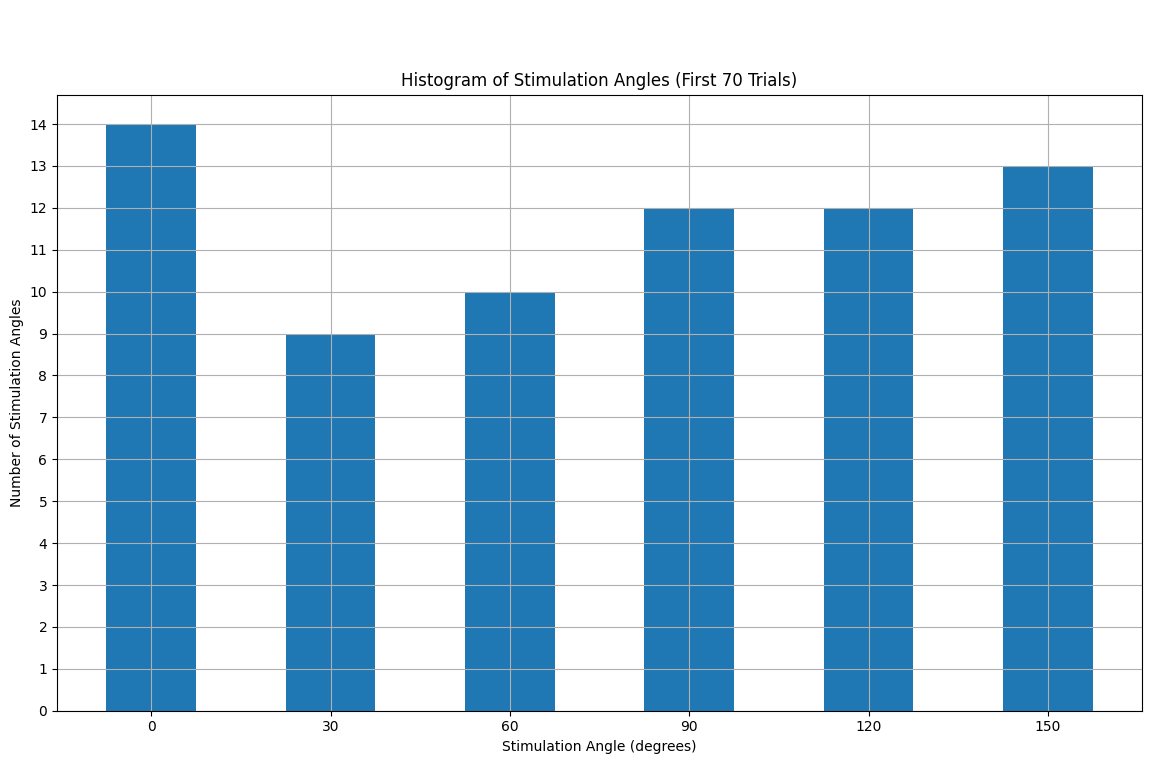

In [7]:
# My code here
training_trials_num = 70  # number of trials for training

### If original angle 𝜃 in the list < 180, keep it as the same 𝜃; otherwise: adjust such as angle 𝜃 to 𝜃 - 180
unique_angles_adjusted = np.where(unique_angle_list >= 180, unique_angle_list - 180, unique_angle_list)[:6]
# print(unique_angles_adjusted)

stimuli_angles_adjusted = np.where(stimuli[:, 1] >= 180, stimuli[:, 1] - 180, stimuli[:, 1])

# print(stimuli[:,1])
# print(stimuli_angles_adjusted)

# Initialize an empty matrix to store tuning curves
F = np.zeros((num_cells, len(unique_angles_adjusted)))


# Calculate tuning curves for the first 70 trials (training data)
for neuron_idx2 in range(num_cells):
  spike_times2 = neurons[0][neuron_idx2]
  # print(spike_times2)
  # training_stimuli_count = 0

  for angle_idx2, angle2 in enumerate(unique_angles_adjusted):
    # spike_times2 = neurons[0][neuron_idx2]
    # print(angle_idx2)
    # angle_indices2 = np.where(stimuli[:, 1][:training_trials_num] == angle2)[0]
    angle_indices2 = np.where(stimuli_angles_adjusted[:training_trials_num] == angle2)[0]
    # print(stimuli_angles_adjusted[:training_trials_num])
    spike_count2 = 0

    for idx2 in angle_indices2:
      # print(stimuli[idx2, 0])
      # stimuli_time = stimuli[:,0][idx2]
      stimuli_time2 = stimuli[idx2, 0]

      ### If a certain spike time in somewhere of neurons data >= its related peak time in stimuli data
      ### AND < such a spike time + each stimuli trial duration(3.5s = 3500ms)
      ### True: Store such a spike time; False: Do Nothing
      spike_times_within_window2 = spike_times2[np.logical_and(spike_times2 >= stimuli_time2, spike_times2 < stimuli_time2 + stimulus_trial_duration)]
      spike_count2 = spike_count2 + len(spike_times_within_window2)

    average_spike_count2 = spike_count2 / len(angle_indices2)

    ### Compute the matrix F by recalculating the tuning curves:
    F[neuron_idx2, angle_idx2] = average_spike_count2
    # print(F)

print("Matrix F:\n", F)

# print(stimuli_angles_adjusted[:training_trials_num])
# print(len(stimuli_angles_adjusted[:training_trials_num]))

histogram, bins = np.histogram(stimuli_angles_adjusted[:training_trials_num], bins = len(unique_angles_adjusted))
# print(histogram)

plt.figure(figsize=(14, 8))
# Plotting histogram of stimulation angles for the first 70 trials
# plt.hist(stimuli_angles_adjusted[:training_trials_num], bins = 6, align = 'mid')
plt.bar(unique_angles_adjusted, histogram, width = 15, align='center')

plt.title('\n\n\nHistogram of Stimulation Angles (First 70 Trials)')
plt.xlabel('Stimulation Angle (degrees)')
plt.ylabel('Number of Stimulation Angles')
plt.xticks(np.arange(0, 151, 30))
plt.yticks(np.arange(0, max(histogram) + 1, 1))
plt.grid(True)
plt.show()

### 2
For the 50 "testing" trials, compute a $n \times 50$ matrix **S** where each row represents the number of spikes one neuron fired in response to a each of the 50 trials.

With this, you can easily compute the log likelihood functions for all the trials at once with the command: `L_test = S'*log(F)`. (Hint: add a small number to `F` to avoid taking the log of 0)

In [8]:
# My code here
testing_trials_num = 50  # number of trials for training

# Initialize an empty matrix to store tuning curves
S = np.zeros((num_cells, testing_trials_num))

# training_stimuli_list = []
# test_trial_index_list = np.arange(70, 120, 1)

# print(stimuli[2, 0])
# print(stimuli[116, 0])
# print(stimuli_angles_adjusted[training_trials_num:training_trials_num + testing_trials_num])
# print(neurons[0][3])

### Calculate tuning curves for the remaining 50 trials (testing data)
for test_trial_index in range(training_trials_num, training_trials_num + testing_trials_num):
    # spike_times3 = neurons[0][neuron_idx3]
    # spike_times3 = stimuli[:, 0][test_trial_index]

    for neuron_idx3 in range(num_cells):
      spike_count3 = 0
      spike_times3 = neurons[0][neuron_idx3]
      # print(spike_times3)
      stimuli_time3 = stimuli[test_trial_index, 0]

      ### If a certain spike time in somewhere of neurons data >= its related peak time in stimuli data
      ### AND < such a spike time + each stimuli trial duration(3.5s = 3500ms)
      ### True: Store such a spike time; False: Do Nothing
      spike_times_within_window3 = spike_times3[np.logical_and(spike_times3 >= stimuli_time3, spike_times3 < stimuli_time3 + stimulus_trial_duration)]
      spike_count3 = spike_count3 + len(spike_times_within_window3)

      S[neuron_idx3, test_trial_index - training_trials_num] = spike_count3
# print("Matrix S:\n", S)

### Add a small number to F to avoid taking the log of 0(Though it's not necessary for the F Matrix of the mouseV1.mat)
small_num = 1 * 10**-16
F = F + small_num

### Log likelihood functions for all the trials
L_test = np.matmul(S.transpose(), np.log(F))
# print("Likelihood Test:\n", L_test)

####2a
Plot the likelihood functions for the first four testing trials in a $2\times 2$ subplot. In the title of each plot, give the trial number (1, 2, 3, or 4) and the true stimulation angle. Make sure to label your axes correctly. (5 pts)

True Angles(degrees) of first 4 testing trials: [ 0  0 60  0] 



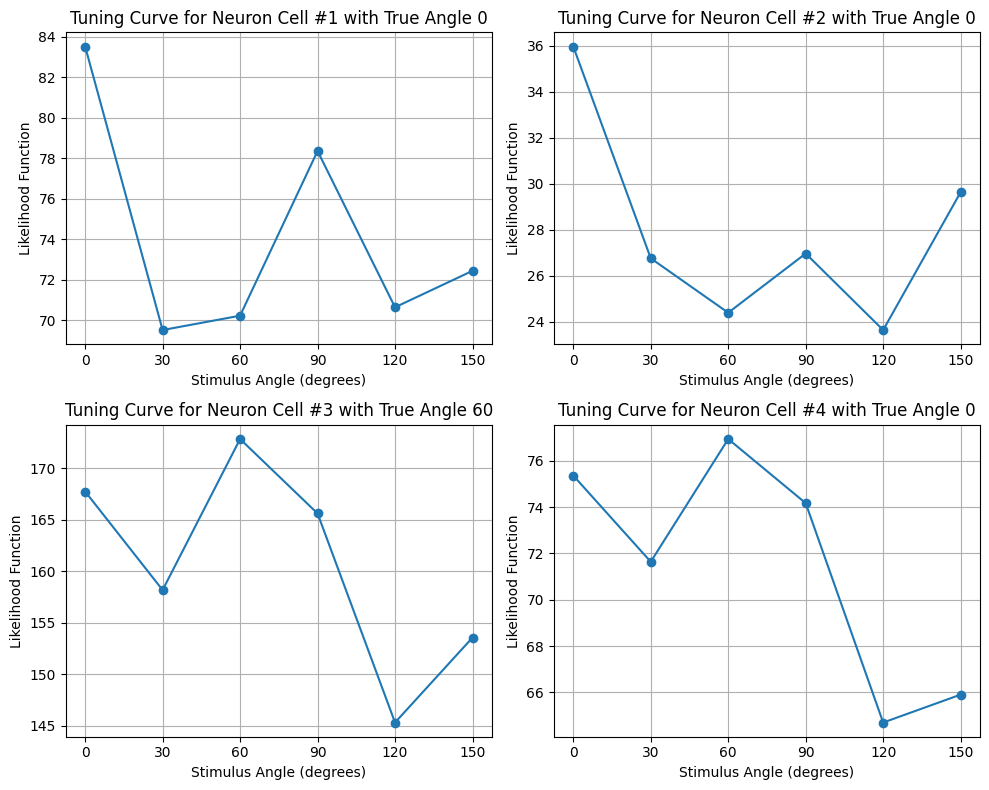

In [9]:
# print(stimuli)
# print(stimuli[:,1])
print("True Angles(degrees) of first 4 testing trials:", stimuli_angles_adjusted[70:74], "\n")

# Initialize subplot
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

for plot2 in range(4):
  plot_row_idx2 = plot2 // 2
  plot_col_idx2 = plot2 % 2
  ax = axs[plot_row_idx2, plot_col_idx2]
  ax.plot(unique_angles_adjusted, L_test[plot2], '-o')
  ax.set_title(f'Tuning Curve for Neuron Cell #{plot2 + 1} with True Angle {stimuli_angles_adjusted[plot2 + 70]}')
  ax.set_xlabel('Stimulus Angle (degrees)')
  ax.set_ylabel('Likelihood Function')
  ax.set_xticks(np.arange(0, 151, 30))
  ax.grid(True)

plt.tight_layout()
plt.show()

####2b
How well do these four likelihood functions seem to match the true stimulation angle? Explain in a few sentences. (3 pts)

**My Answer Here:**

To use likelihood functions to predict True Angles, we should find the Maximum likelihood of specific cells and then check its related angle from prediction. From the four plots of the Tuning Curve of different accurate angles above, it's evident that the first three predictions for actual angles are accurate(= True Angles: 0, 0, 60 degrees), but the last prediction is wrong(60 degrees != True Angles 0 degree). The accuracy of the four likelihood functions shows that **Jazayeri's prediction method might Not be Consistent.**

####2c
Compute the maximum likelihood estimate (MLE) for each of the 50 trials. This is another way of asking which angle $\theta$ has the highest probability.

> $ \hat{\theta}_{MLE} = \arg\max_\theta\; L(\theta) = \arg\max_\theta\; \log L(\theta)$.

> In what percentage of the 50 trials did your MLE correctly predict the stimulation angle [0-150]? (5 pts)

In [10]:
# My code here
# print("Matrix F:\n", F)
# print("Likelihood Test:\n", L_test)
# print(len(L_test))

Predict_MLE_Arr = np.argmax(L_test, axis = 1)
print("Maximum likelihood estimate (MLE) for each of the 50 trials:\n", Predict_MLE_Arr)
# print(len(Predict_MLE_Arr))

# print(stimuli_angles_adjusted[training_trials_num:training_trials_num + testing_trials_num])

true_angle_list = []

### Accumulate a list with all true angles of the remaining 50 trials (testing data)
for test_angle in stimuli_angles_adjusted[training_trials_num:training_trials_num + testing_trials_num]:

  ### Accumulate true angle indices to compare with predicted angle indices from MLE
  testing_angles_index = np.where(test_angle == unique_angles_adjusted)[0][0]
  # print(testing_angles_index)
  true_angle_list.append(testing_angles_index)
true_angle_arr = np.array(true_angle_list)
# print(true_angle_arr)

accurate_samples = np.where(Predict_MLE_Arr == true_angle_arr)[0]
# print(accurate_samples)
accurate_nums = len(accurate_samples)

Test_Accuracy = accurate_nums / testing_trials_num
print("\nPercentage of the 50 trials my MLE correctly predict the stimulation angle [0-150]:", Test_Accuracy)

Maximum likelihood estimate (MLE) for each of the 50 trials:
 [0 0 2 2 3 0 2 0 4 2 2 4 0 2 2 2 2 2 0 2 3 3 2 0 0 2 2 2 3 0 0 2 2 2 3 3 3
 2 2 2 0 3 2 2 3 2 0 3 3 3]

Percentage of the 50 trials my MLE correctly predict the stimulation angle [0-150]: 0.42


**My Answer Here:**

Percentage of the 50 trials my MLE correctly predict the stimulation angle [0-150] = **42%**

####2d
In a few sentences, discuss how well this method worked for predicting the input angle from the response of the 18 neurons.  What might you change in the experimental protocol to try and get a better prediction? (3 pts)  

**My Answer Here:**

The percentage of the 50 trials in which your MLE correctly predicted the stimulation angle [0-150] shows that this method is **NOT Precise Enough** for predicting the input angle from the response of the 18 neurons. To change my experimental protocol to achieve a better prediction:

(1) We need to **accumulate more data samples** to achieve a better prediction.

(2) Meanwhile, because a particular cluster of data may share similarities without shuffling, we should **randomly split up training and testing data** instead of merely assigning the first 70 trials of stimuli data as training data and the remaining 50 trials of stimuli data as testing data.

(3) Furthermore, we can **normalize features of the F Matrix** similar to what we have done in HW4: subtract each feature in F Matrix by F Matrix's mean and then divide it by F Matrix's standard deviation (creating features with zero mean and unit variance), which is a straightforward normalization method.

### 3
It is important to show that your findings are not a result of chance.
One way to demonstrate this is using a "permutation test." Here, we will perform a permutation test by randomly reassigning new grating angles to the 50 test responses and then calculating how often the new grating angles match the true stimulation angles.

####3a
Simulate the chance prediction (the "null" distribution) by randomly reassigning the stimulation angles 1000 times.  For each permutation, calculate the percent accuracy of each label. Create a histogram of the 1000 accuracy measurements for the null distribution. Add a red vertical line with the accuracy calculated from using the Jazayeri method above. Hint: You should see a very recognizable type of distribution. If you're having trouble seeing it, try increasing the number of histogram bins. (4 pts)

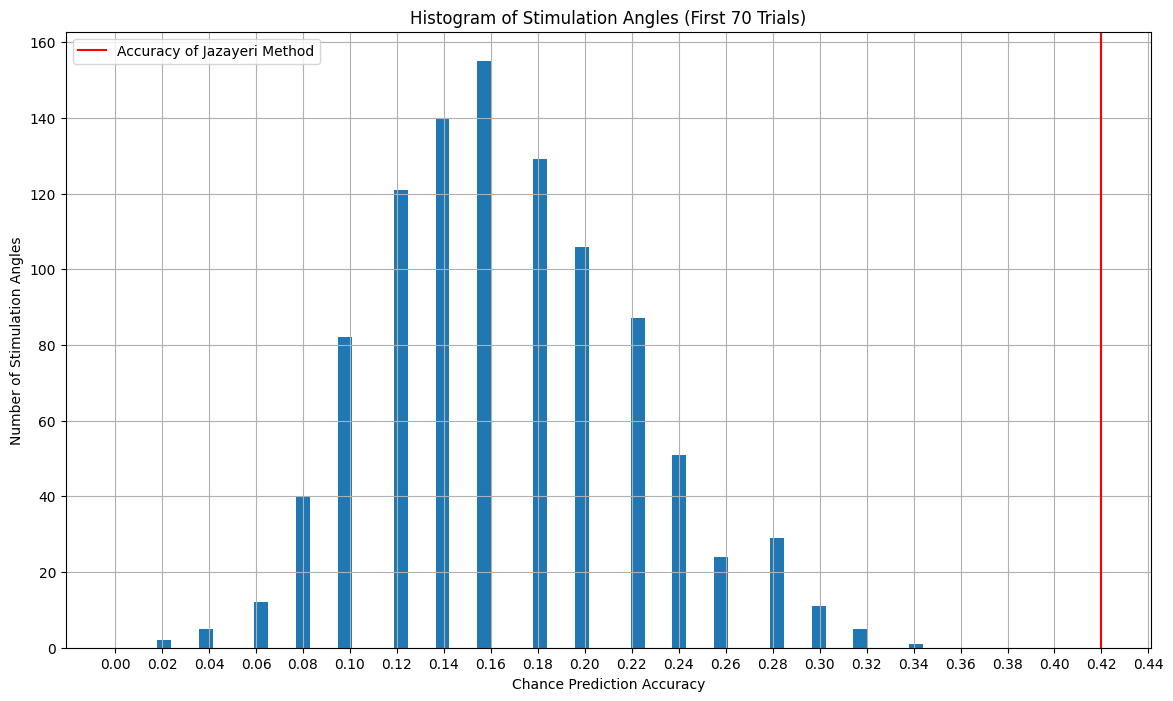

In [15]:
# My code here
### Import a new library called "random" to reassigan 1000 simulations
import random
# print(stimuli[:,1])
# print(stimuli_angles_adjusted)

stimuli_angles_adjusted2 = stimuli_angles_adjusted.copy()
# stimuli_angles_adjusted2 = np.zeros((120, 1))
# print(stimuli_angles_adjusted)

Random_Test_Accuracy_List = []
Accuracy_Measure_Nums = 1000

### Randomly reassign stimulation angles 1000 times
for _ in range(Accuracy_Measure_Nums):

  ### Random reassign among adjusted stimuli angles [0, 150]
  for choices in range(len(stimuli_angles_adjusted2)):
    stimuli_angles_adjusted2[choices] = random.choice(unique_angles_adjusted)
    # print(stimuli_angles_adjusted2)
    # print(len(stimuli_angles_adjusted2))

    random_true_angle_list = []

    ### Calculate out accuracy of prediction in each testing trial
    for random_test_angle in stimuli_angles_adjusted2[training_trials_num:training_trials_num + testing_trials_num]:
      # print(random_test_angle)

      random_testing_angles_index = np.where(random_test_angle == unique_angles_adjusted)[0][0]
      # print(random_testing_angles_index, '\n')

      random_true_angle_list.append(random_testing_angles_index)
      # print(random_true_angle_list)
      # print(len(random_true_angle_list))

    random_true_angle_arr = np.array(random_true_angle_list)
    # print(true_angle_arr)

    # print(random_true_angle_arr)
    # print(len(random_true_angle_arr))

    random_accurate_samples = np.where(random_true_angle_arr == true_angle_arr)[0]
    # print(random_accurate_samples)
    random_accurate_nums = len(random_accurate_samples)

    Random_Test_Accuracy = random_accurate_nums / testing_trials_num
    # print(Random_Test_Accuracy)

  Random_Test_Accuracy_List.append(Random_Test_Accuracy)
  # print(len(Random_Test_Accuracy_List))
# print(Random_Test_Accuracy_List)

histogram2, bins2 = np.histogram(Random_Test_Accuracy_List,np.linspace(0, max(Random_Test_Accuracy_List) + 0.01, 60))
# print(histogram2)

plt.figure(figsize=(14, 8))
plt.hist(bins2[:-1], bins2, weights = histogram2)

plt.title('Histogram of Stimulation Angles (First 70 Trials)')
plt.xlabel('Chance Prediction Accuracy')
plt.ylabel('Number of Stimulation Angles')
plt.axvline(x = Test_Accuracy, color = 'red', label = 'Accuracy of Jazayeri Method')
plt.xticks(np.arange(0, 0.45, 0.02))
#plt.yticks(np.arange(0, max(histogram2) + 1, 1))
plt.grid(True)
plt.legend()
plt.show()

####3b
Is the null distribution what you expected? Explain. (1 pt)

**My Answer Here:**

**The null distribution fits my expectation which looks like Normal Distribution.** Randomly reassigning new angles to test trials of stimuli data may break the original relations between sample angles and speak times, thus the accuracy of chance prediction(New Histogram) should be lower than Jazayeri's prediction method above(Red Vertical Line). But because we follow the adjust unique angle list to randomly reassign new angles, the accuracy of prediction should not be extremely low.

That's why we notice that when Change Prediction Accuracy increases, its related Number of Stimulation Angles gradually increases until it reaches the peak as Change Prediction Accuracy approximately equals 0.16, and then slowly decreases. **If we assume the center of distribution as Change Prediction Accuracy = 0.16, left and right tendencies are almost symmetrically distributed.**

####3c
What is the probability that your actual accuracy measurement comes from the null-distribution?  That is, calculate the fraction of permutation samples with accuracy *more extreme* relative to the mean of the null distribution (less than your measurement if your value is less than the mean, or more than your measurement if your value is more than the mean). You may find functions in the already-imported `scipy.stats` package to be helpful. (2 pts)

**Function:**

**[1]** scipy.stats.ttest_ind_from_stats(mean1, std1, nobs1, mean2, std2, nobs2, equal_var=True, alternative='less')

This T-test function returns T-statistics and P-value(Use default alternative alternative='less'
to calculate a **left-tailed P-Value**).

**The probability that my actual accuracy measurement comes from the null-distribution = P-values**

**[2]** I also show another method which calculates the **cumulative probability**, which shows very close results as previous method[1] shows.

**Reference:**

**[1]** https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind_from_stats.html

**[2]** https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

**Note:** This probability would change due to randomly reassiganing new angles.

In [24]:
# My code here
null_accuracy_mean = np.mean(Random_Test_Accuracy_List)
null_accuracy_std = np.std(Random_Test_Accuracy_List)
null_nums = len(Random_Test_Accuracy_List)

### Null left-sided P-value
Null_T_Test = scipy.stats.ttest_ind_from_stats(null_accuracy_mean, null_accuracy_std, null_nums, Test_Accuracy, 0, 1, alternative = 'less')
print("Null-T-Test:", Null_T_Test)

### Null Cumulative Probability
Null_Cumulative_Pr = 1 - scipy.stats.norm.cdf(x = Test_Accuracy, loc = null_accuracy_mean, scale = null_accuracy_std)
print("Null Cumulaive Probability:", Null_Cumulative_Pr)

Null-T-Test: Ttest_indResult(statistic=-4.716525751686087, pvalue=1.369972848944301e-06)
Null Cumulaive Probability: 1.1857132896642142e-06


**My Answer Here:**

The probability that my actual accuracy measurement comes from the null-distribution: **1.1857132896642142e-06**

####3d
What would the probability be if your accuracy had been 25\%? (1 pt)

**Note:** This probability would change due to randomly reassiganing new angles.

In [23]:
# My code here
### Updated left-sided P-value
update_accuracy = 0.25
Update_T_Test = scipy.stats.ttest_ind_from_stats(null_accuracy_mean, null_accuracy_std, null_nums, update_accuracy, 0, 1, alternative = 'less')
print("Updated T-Test of Accuracy = 25%:", Update_T_Test)

### Updated Cumulative Probability
Updated_Cumulative_Pr = 1 - scipy.stats.norm.cdf(x = update_accuracy, loc = null_accuracy_mean, scale = null_accuracy_std)
print("Updated Cumulaive Probability of Accuracy = 25%:", Updated_Cumulative_Pr)

Updated T-Test of Accuracy = 25%: Ttest_indResult(statistic=-1.5513221444437262, pvalue=0.06057061214779948)
Updated Cumulaive Probability of Accuracy = 25%: 0.06031943468773959


**My Answer Here:**

The probability be if your accuracy had been 25%: **0.06031943468773959**

####3e
What is this value typically called? (1 pt)

**My Answer Here:**

This value is typically called: **P-value**

**Note:** Such a P-value is left-tailed, we can also consider this value as **Comulative Probability**.

### 4
The tuning curves and neuron responses to a new trial were calculated using the number of spikes each neuron fired after the stimulation.
But what if a particular neuron just happens to fire a lot and fires even more when it gets a stimulus to which it's tuned? Those neurons could "swamp" the log likelihood estimate given in Equation 1 by virtue of just having a larger average $s_i$ and $f_i(\theta)$. How might we correct for this type of behavior?  Suggest a possible method. (2 pts)

**My Answer Here:**

To correct fired neurons "swamp" the log likelihood estimation, one potential solution is to **normalize the spike counts before calculating the log probability** to account for the possible bias caused by neurons that fire more often overall and may consequently dominate the log-likelihood estimate. To do this, divide the total number of spikes in each neuron over all angles by the number of spikes in each neuron.

**Using this normalization, the weighting of each neuron's contribution to the log probability would depend on its relative responsiveness to various angles instead of just its firing rate.** The effect of neurons that fire more often overall is lessened on the log probability estimate using this normalizing technique.